###Loading the packages and libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# path='/content/drive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/metadata.csv'
# df=pd.read_csv(path)
# df=pd.read_csv('metadata.csv')

In [4]:
df.shape
df.finding.value_counts()

COVID-19          340
Streptococcus      17
SARS               16
Pneumocystis       15
COVID-19, ARDS     12
No Finding          9
E.Coli              4
ARDS                4
Chlamydophila       2
Legionella          2
Klebsiella          1
Name: finding, dtype: int64

In [4]:
df.isnull().sum()

patientid                   0
offset                    127
sex                        57
age                        54
finding                     0
labels                      0
survival                  284
intubated                 327
intubation_present        316
went_icu                  339
in_icu                    373
needed_supplemental_O2    410
extubated                 399
temperature               385
pO2_saturation            378
leukocyte_count           410
neutrophil_count          420
lymphocyte_count          412
view                        0
modality                    0
date                      131
location                  114
folder                      0
filename                    0
doi                       318
url                         0
license                   162
clinical_notes             10
other_notes               184
Unnamed: 29               418
dtype: int64

In [5]:
df.head()

,patientid,offset,sex,age,finding,labels,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,COVID-19,1,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,1,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,1,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,1,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,1,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


###Explanatory Data Analysis

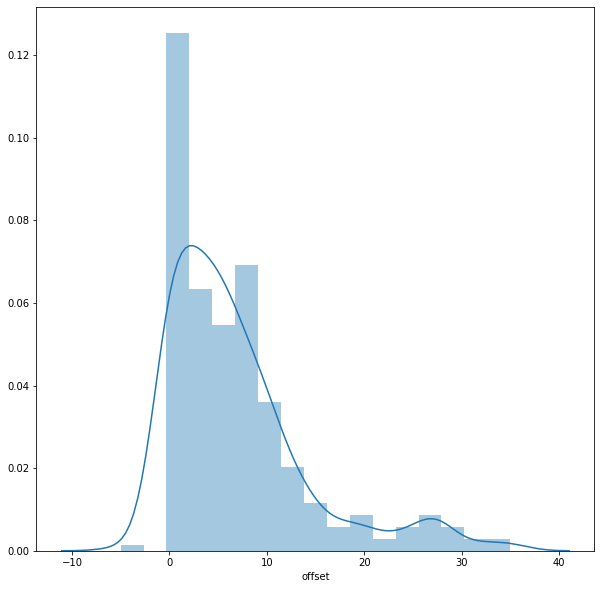

In [25]:
plt.figure(figsize=(10,10))
sns.distplot(df['offset'],kde=True)
plt.show()

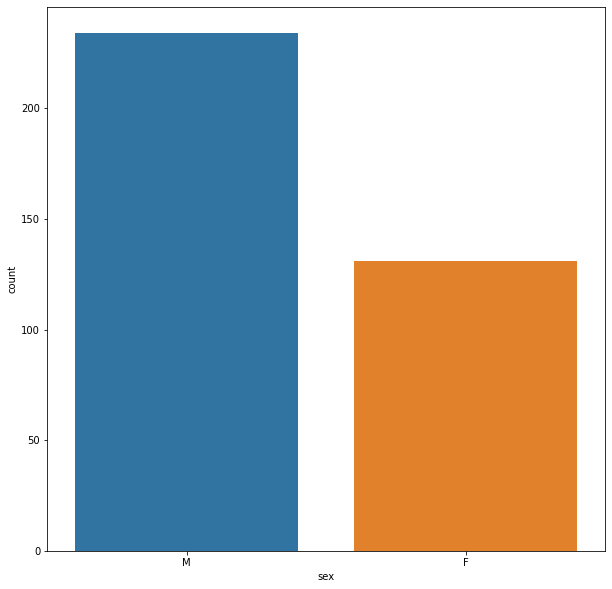

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(df['sex'])
plt.show()

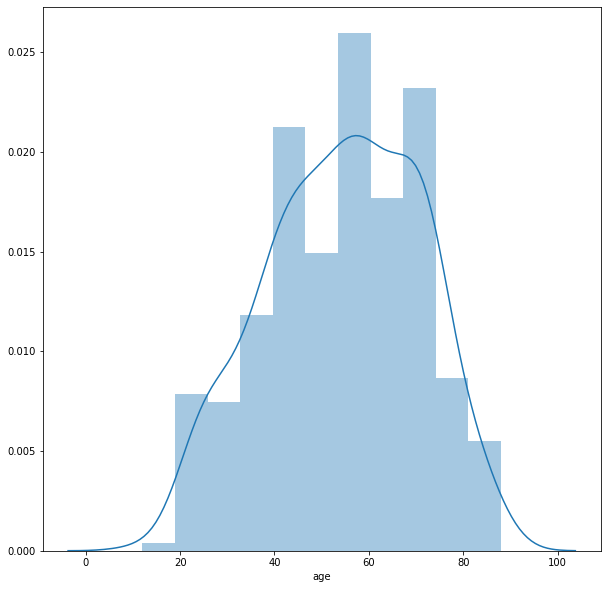

In [26]:
plt.figure(figsize=(10,10))
sns.distplot(df['age'],kde=True)
plt.show()

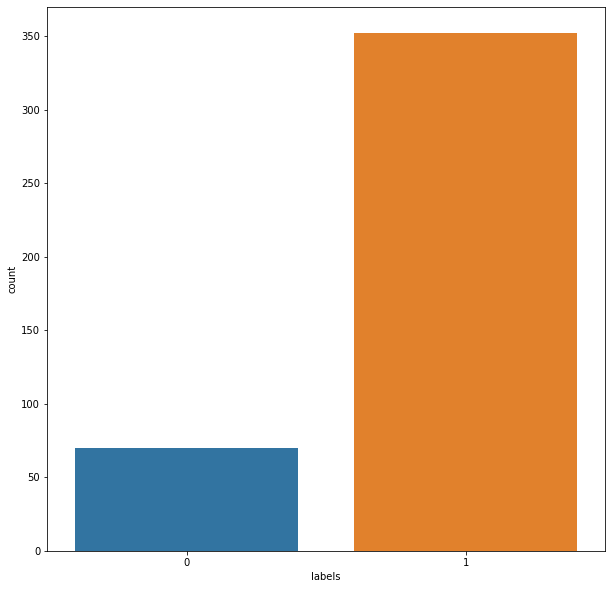

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(df['labels'])
plt.show()

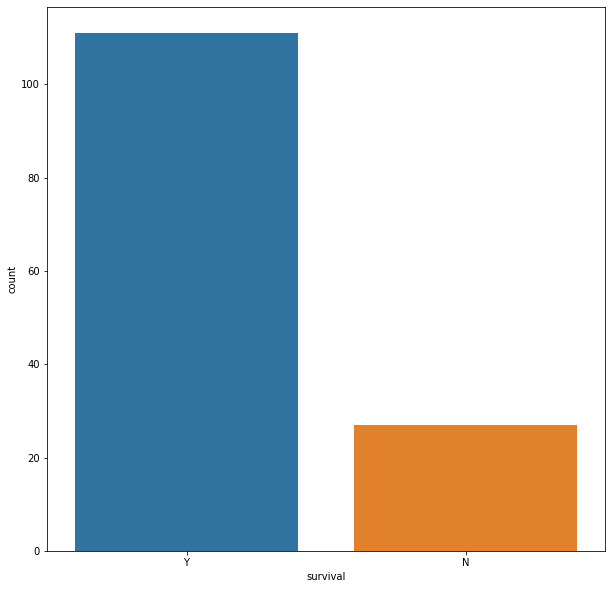

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(df['survival'])
plt.show()

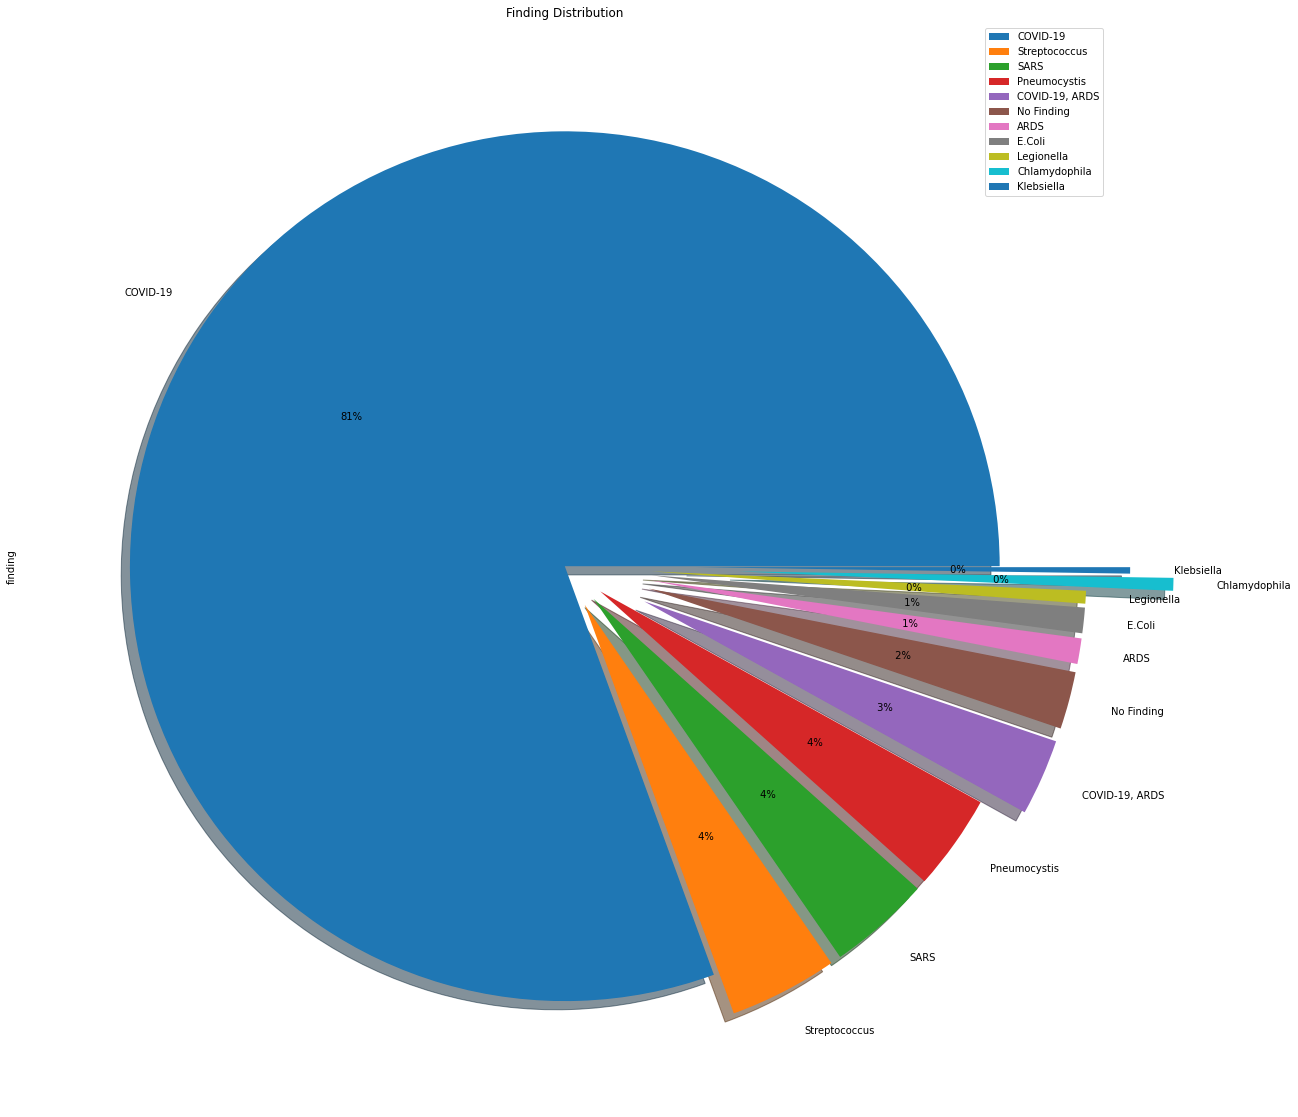

In [59]:
ax = df['finding'].value_counts(dropna=False).plot.pie(y='Finding', legend = True, autopct='%2.0f%%', figsize = (20,20),shadow=True, title = 'Finding Distribution',explode=(0,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.4,0.3))

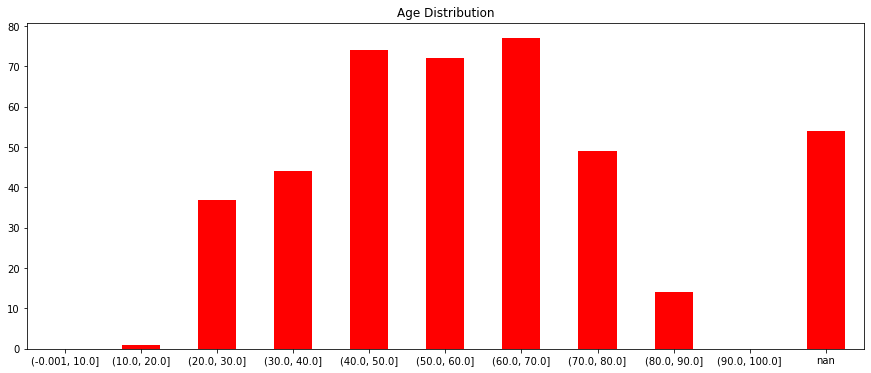

In [46]:
out = pd.cut(df['age'], bins=np.arange(0,110,10).tolist(), include_lowest=True)
ax = out.value_counts(sort=False, dropna=False).plot.bar(rot=0, color="r", figsize=(15,6), title= "Age Distribution")
plt.show()

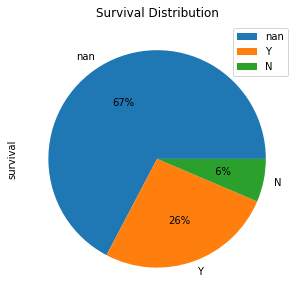

In [48]:
ax = df['survival'].value_counts(dropna=False).plot.pie(y='survival', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Survival Distribution')

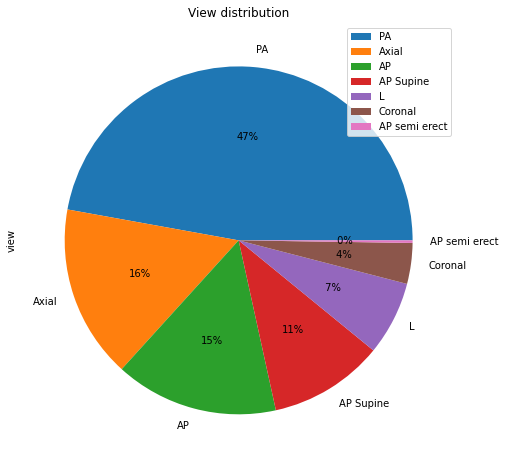

In [49]:
ax = df['view'].value_counts(dropna=False).plot.pie(y='view', legend = True, autopct='%2.0f%%', figsize = (8,8), title = 'View distribution')

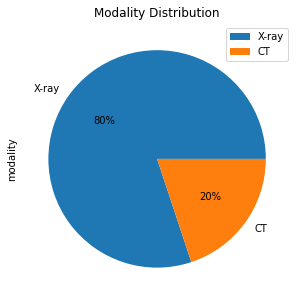

In [50]:
ax = df['modality'].value_counts(dropna=False).plot.pie(y='modality', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Modality Distribution')

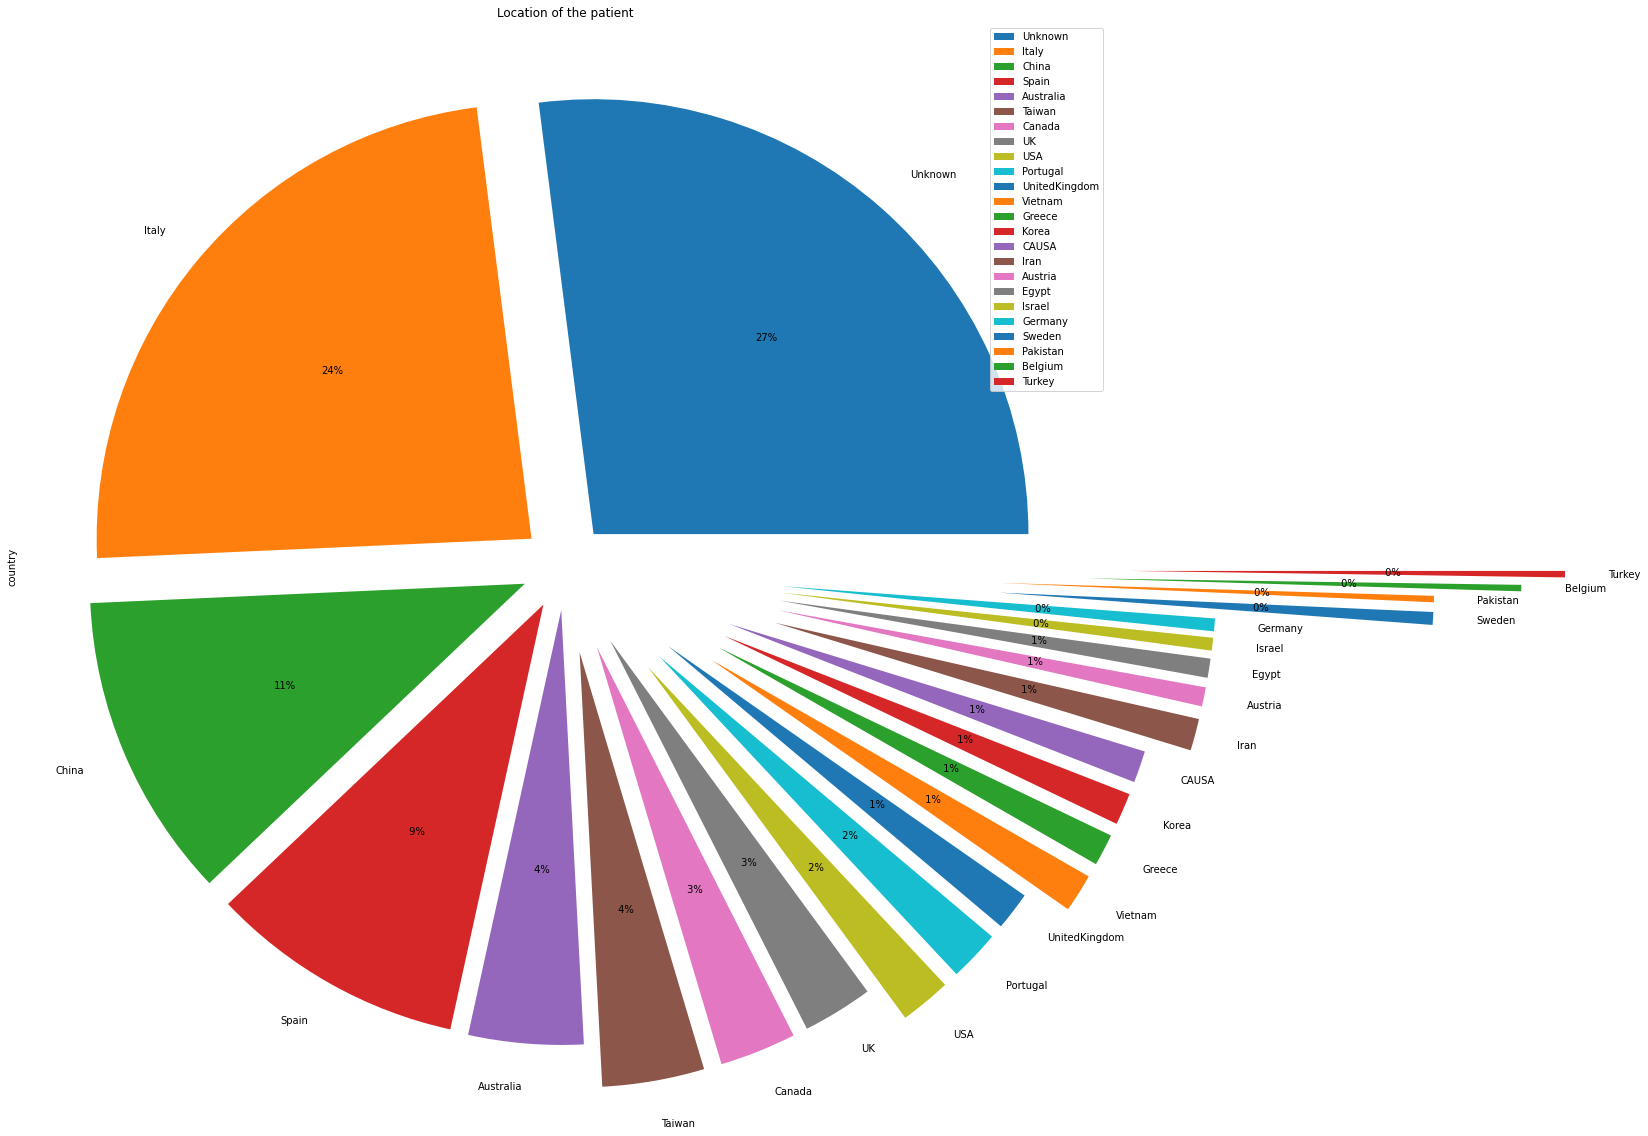

In [58]:
df['country'] = df['location'].apply(lambda x: x.split(',')[-1].replace(" ","") if x is not np.nan else "Unknown")
ax = df['country'].value_counts(dropna=False).plot.pie(y='country', legend = True, autopct='%2.0f%%', figsize = (20,20), title = 'Location of the patient',explode=(0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.5,0.5,0.5,0.5,0.5,1.0,1.0,1.2,1.3))

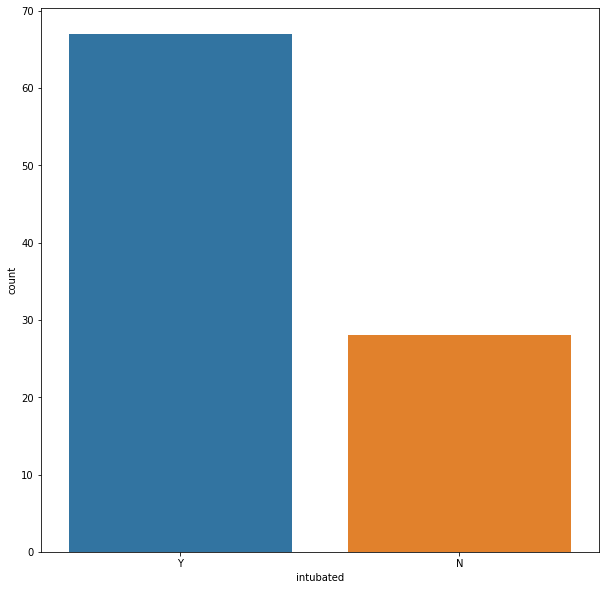

In [61]:
plt.figure(figsize=(10,10))
sns.countplot(df['intubated'])
plt.show()

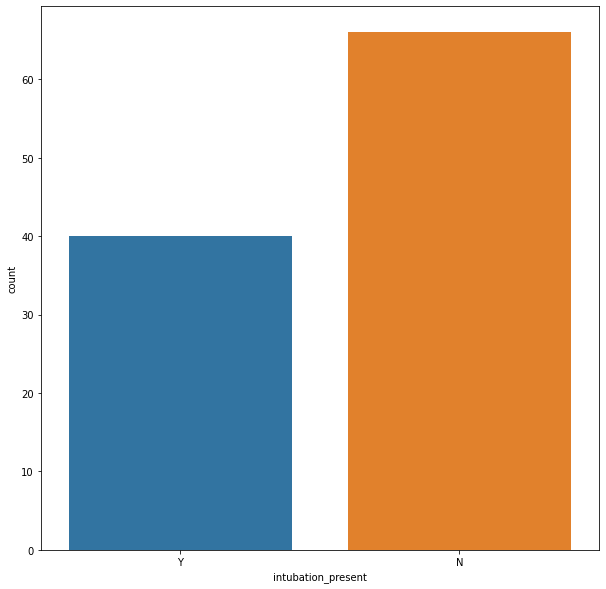

In [62]:
plt.figure(figsize=(10,10))
sns.countplot(df['intubation_present'])
plt.show()

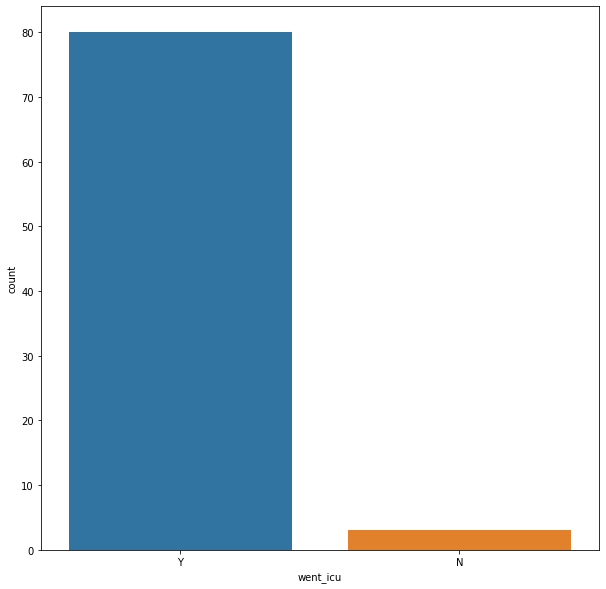

In [63]:
plt.figure(figsize=(10,10))
sns.countplot(df['went_icu'])
plt.show()

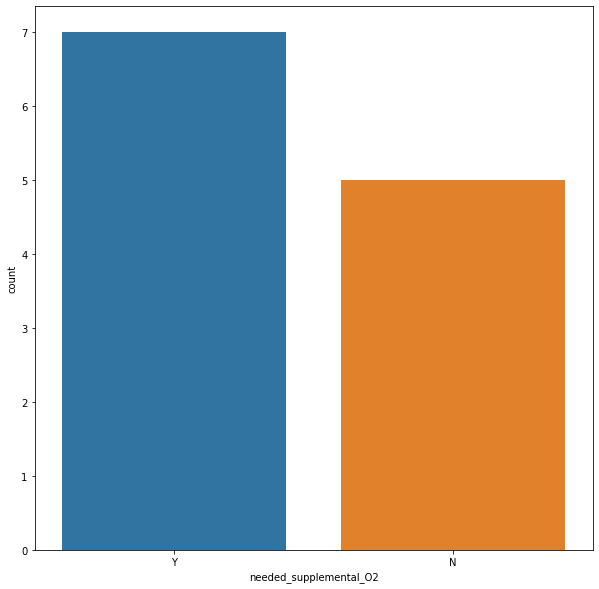

In [66]:
plt.figure(figsize=(10,10))
sns.countplot(df['needed_supplemental_O2'])
plt.show()

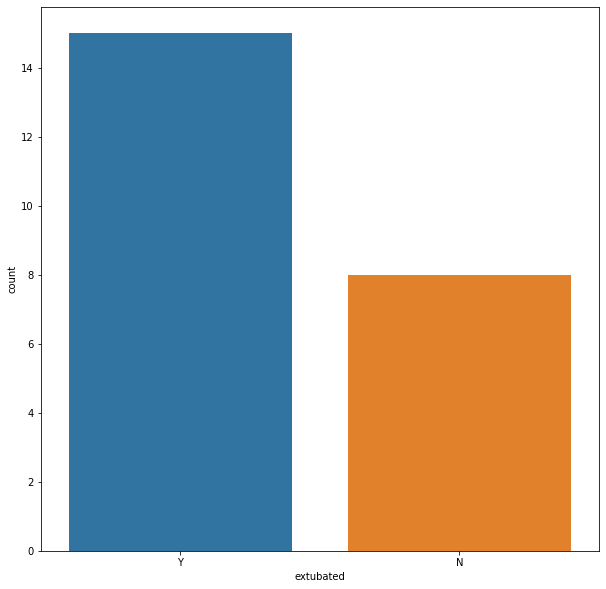

In [67]:
plt.figure(figsize=(10,10))
sns.countplot(df['extubated'])
plt.show()

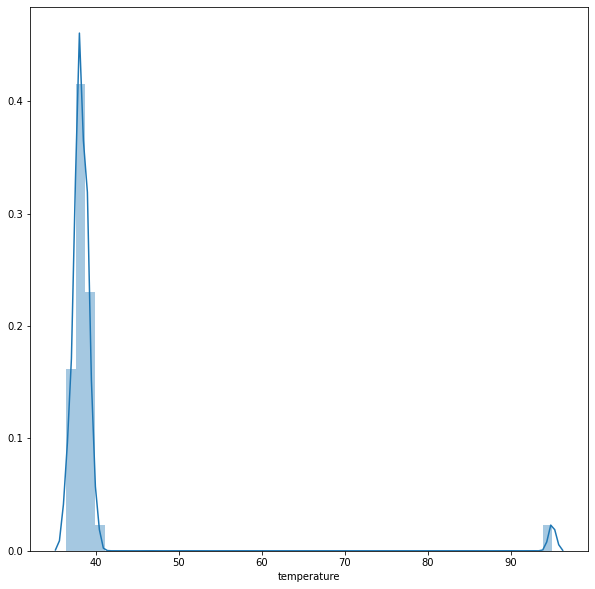

In [69]:
plt.figure(figsize=(10,10))
sns.distplot(df['temperature'])
plt.show()

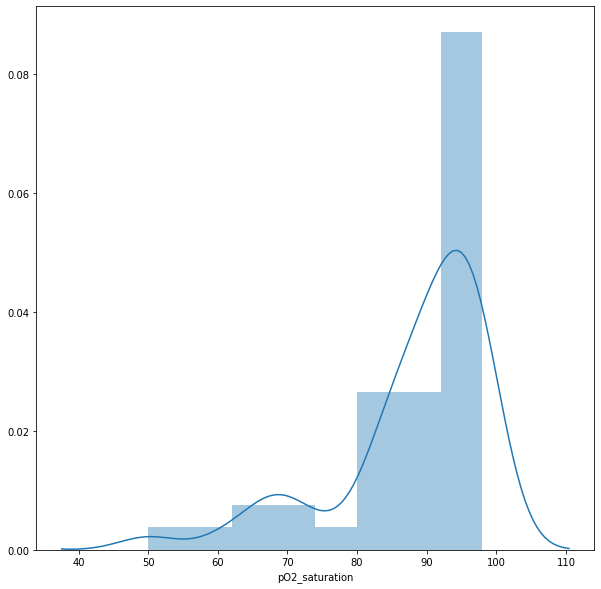

In [70]:
plt.figure(figsize=(10,10))
sns.distplot(df['pO2_saturation'])
plt.show()

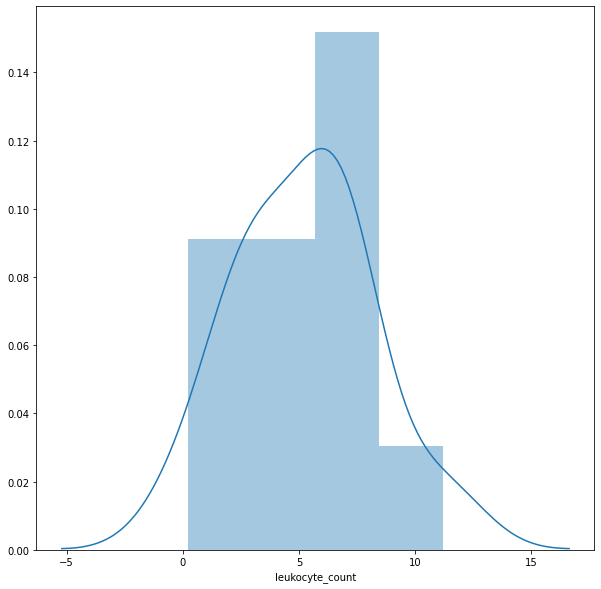

In [71]:
plt.figure(figsize=(10,10))
sns.distplot(df['leukocyte_count'])
plt.show()

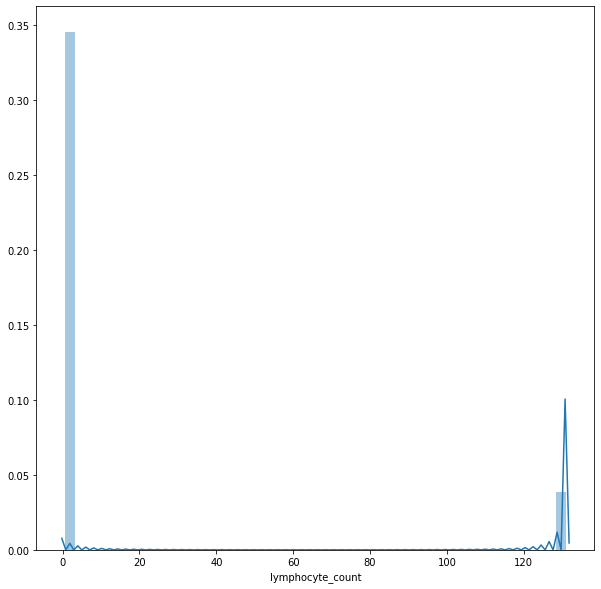

In [73]:
plt.figure(figsize=(10,10))
sns.distplot(df['lymphocyte_count'])
plt.show()

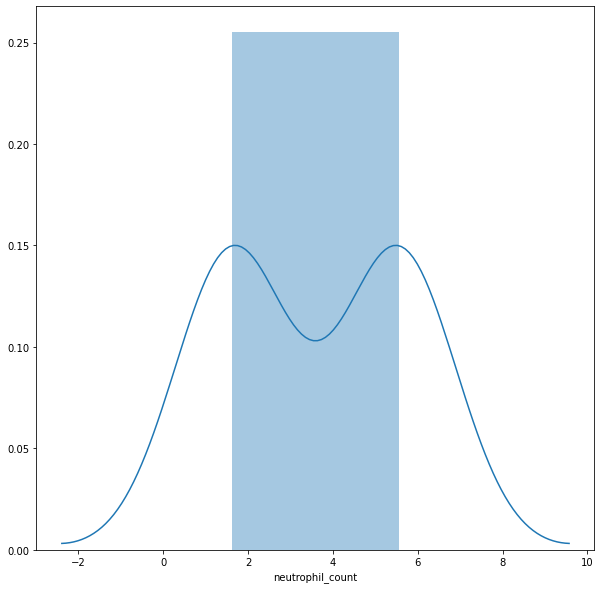

In [72]:
plt.figure(figsize=(10,10))
sns.distplot(df['neutrophil_count'])
plt.show()

In [60]:
df.dtypes

patientid                   int64
offset                    float64
sex                        object
age                       float64
finding                    object
labels                      int64
survival                   object
intubated                  object
intubation_present         object
went_icu                   object
in_icu                     object
needed_supplemental_O2     object
extubated                  object
temperature               float64
pO2_saturation            float64
leukocyte_count           float64
neutrophil_count          float64
lymphocyte_count          float64
view                       object
modality                   object
date                       object
location                   object
folder                     object
filename                   object
doi                        object
url                        object
license                    object
clinical_notes             object
other_notes                object
Unnamed: 29   

In [74]:
cor=df.corr()

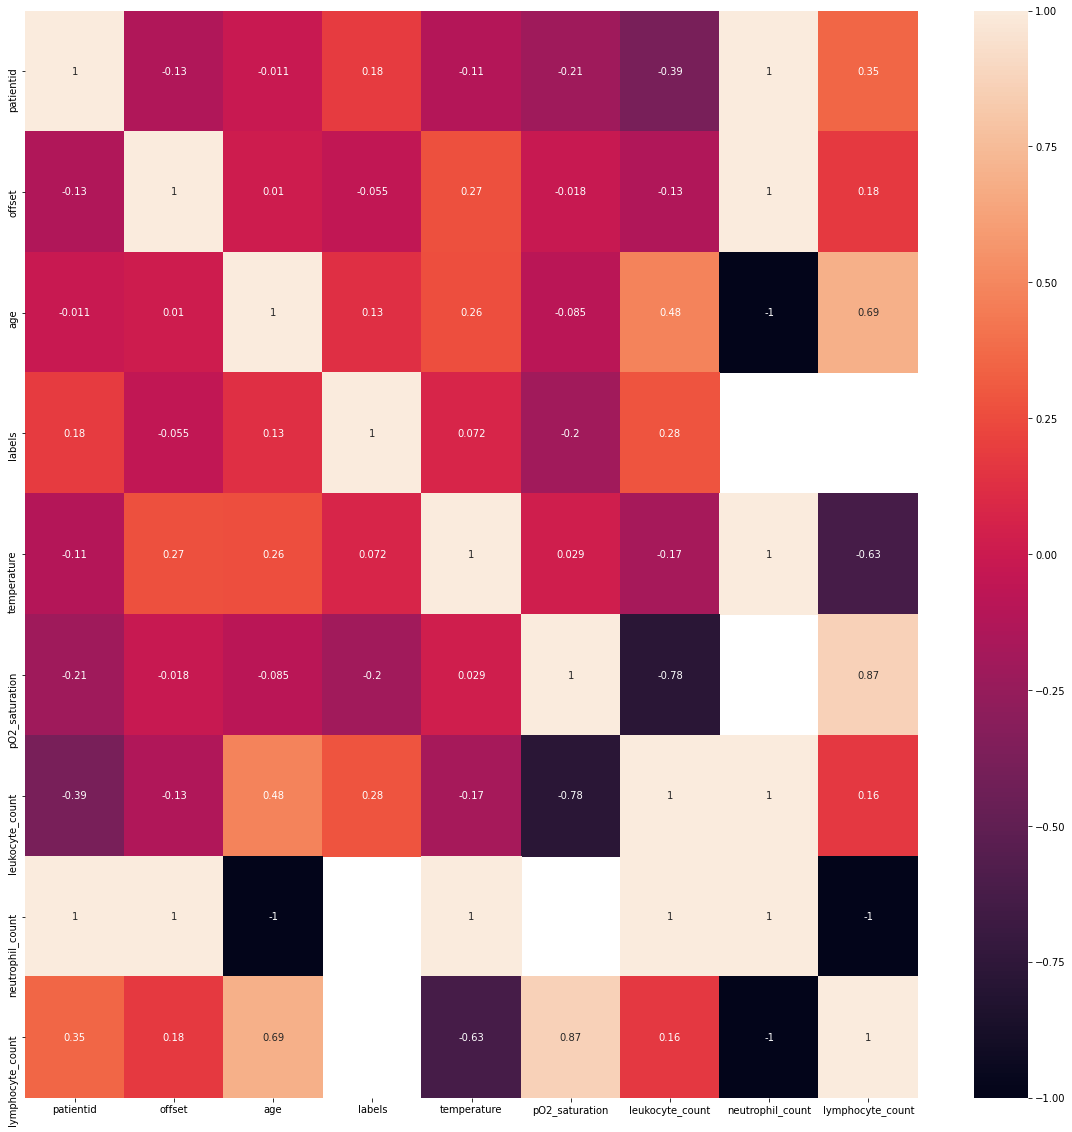

In [76]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)
plt.show()

#Important Note:
####Since we are dealing with Covid-19 classification only the columns related to images are necessary and others are dropped as per the requirements

###Data Prepreocessing

In [77]:
df=df.drop(axis=1,columns='Unnamed: 29')
df=df.drop(axis=1,columns='other_notes')

In [78]:
df.drop(axis=1,columns=['doi','url','license','clinical_notes','date'],inplace=True)

In [79]:
df_new=df.drop(columns=['patientid','age','sex','offset','survival','intubated','intubation_present','went_icu','in_icu','needed_supplemental_O2','extubated','temperature','pO2_saturation','leukocyte_count','neutrophil_count','lymphocyte_count','location'],axis=1)

In [80]:
df_new= df_new[df_new['folder']!= 'volumes']

In [81]:
df_new.shape

(401, 7)

####Since  PA, AP , AP Supine gives the clear view we drop the remaining features of those column

In [83]:
df_new= df_new[df_new['view']!= 'L']
df_new= df_new[df_new['view']!= 'Axial']
df_new= df_new[df_new['view']!= 'Coronal']
df_new= df_new[df_new['view']!= 'AP semi erect']

In [84]:
df_new['view'].unique()

array(['PA', 'AP', 'AP Supine'], dtype=object)

#####Here we are dealing with X-ray images so we drop CT images

In [85]:
df_new=df_new[df_new['modality']!='CT']
df_new['modality'].unique()

array(['X-ray'], dtype=object)

In [86]:
df_new.view=df_new.view.astype(str)
df_new.modality=df_new.modality.astype(str)
df_new.folder=df_new.folder.astype(str)
df_new.filename=df_new.filename.astype(str)

In [87]:
df_new.shape

(308, 7)

In [88]:
cov_df=df_new[df_new['labels']==1]

PA           153
AP            56
AP Supine     41
Name: view, dtype: int64

In [89]:
cov_df.to_csv('/content/drive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/COVID_19_pos.csv',index=False)

In [90]:
cov_df.shape

(250, 7)

In [91]:
not_cov_df=df_new[df_new['labels']==0]

In [92]:
not_cov_df.shape

(58, 7)

In [93]:
not_cov_df.to_csv('/content/drive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/COVID_19_neg.csv',index=False)

###Splitting the images to Covid-19 and Non Covid-19 labels 

In [94]:
import pandas as pd
import shutil
import os

# Virus to look for
label = 1 


imageDir = "/content/drive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images" # Directory of images
outputDir = "/content/drive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/COVID-19" # Output directory to store selected images
if not os.path.exists(outputDir):
  os.mkdir(outputDir)
metadata_csv = cov_df

In [95]:
for (i, row) in metadata_csv.iterrows():
  if row['labels']==label:
    filename = row["filename"].split(os.path.sep)[-1]
    filePath = os.path.sep.join([imageDir, filename])
    shutil.copy2(filePath, outputDir)

In [96]:
label = 0
outputDir_1 = "/content/drive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/datas/NON COVID-19"
if not os.path.exists(outputDir_1):
  os.mkdir(outputDir_1)
metadata_csv = not_cov_df

In [97]:
for (i, row) in metadata_csv.iterrows():
  if row['labels']==label:
    filename = row["filename"].split(os.path.sep)[-1]
    filePath = os.path.sep.join([imageDir, filename])
    shutil.copy2(filePath, outputDir_1)

In [98]:
import os
import numpy as np
import shutil
import random

# # Creating Train / Val / Test folders (One time use)
root_dir = '/content/drive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/datas'
classes_dir = ['/NON COVID-19','/COVID-19']

test_ratio = 0.2

for cls in classes_dir:
    os.makedirs(root_dir +'/train' + cls)
    os.makedirs(root_dir +'/test' + cls)


    # Creating partitions of the data after shuffeling
    src = root_dir + cls # Folder to copy images from

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)* (1 -  test_ratio))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Testing: ', len(test_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy2(name, root_dir +'/train' + cls)

    for name in test_FileNames:
        shutil.copy2(name, root_dir +'/test' + cls)

Total images:  58
Training:  46
Testing:  12
Total images:  246
Training:  196
Testing:  50


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,DenseNet201,ResNet50,VGG19,Xception,InceptionResNetV2
from tensorflow.keras.layers import AveragePooling2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import os

Using TensorFlow backend.


In [100]:
train_path='/content/drive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/IMG/train'
test_path='/content/drive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/IMG/test'

###With Validation data

In [102]:
BS = 2
train_datagen=ImageDataGenerator(rescale=1./255,fill_mode='nearest',validation_split=0.1)
train_generator = train_datagen.flow_from_directory(directory=train_path,target_size=(224,224),class_mode="categorical",batch_size=BS,shuffle=True,seed=42,subset='training')
val_generator=train_datagen.flow_from_directory(directory=train_path,target_size=(224,224),class_mode="categorical",batch_size=BS,subset='validation',shuffle=True,seed=42)

Found 219 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


In [103]:
test_batches=ImageDataGenerator(rescale=1./255,fill_mode='nearest').flow_from_directory(directory=test_path,target_size=(224,224),class_mode="categorical",batch_size=BS,seed=42,shuffle=False)

Found 62 images belonging to 2 classes.


In [105]:
INIT_LR = 1e-5
EPOCHS = 30
BS = 2
k_fold=3
cv_scores, model_history = list(), list()
for i in range(k_fold):
  print("K-FOLD:",i+1)
  baseModel = VGG19(include_top=False,weights='imagenet',input_tensor=Input(shape=(224, 224, 3)))

 

  headModel = baseModel.output
  headModel=GlobalAveragePooling2D()(headModel)
  headModel=Dense(1024,activation='relu')(headModel)
  headModel = Dense(2, activation="softmax")(headModel)

  model = Model(inputs=baseModel.input, outputs=headModel)

  print("[INFO] compiling model...")
  opt = Adam(lr=INIT_LR)
  model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])


  print("[INFO] training head...")
  H = model.fit(x=train_generator,batch_size=BS,epochs=EPOCHS,verbose=2,validation_data=val_generator)
  predictions=model.predict(test_batches)
  predIdxs = np.argmax(predictions, axis=1)
  cm=confusion_matrix(y_true=test_batches.classes,y_pred=predIdxs)
  print(cm)
  print(classification_report(test_batches.classes,predIdxs))
  total = sum(sum(cm))
  acc = (cm[0, 0] + cm[1, 1]) / total
  sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
  specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
  # show the confusion matrix, accuracy, sensitivity, and specificity
  print(cm)
  print("acc: {:.4f}".format(acc))
  print("sensitivity: {:.4f}".format(sensitivity))
  print("specificity: {:.4f}".format(specificity))
  cv_scores.append(acc)
  model_history.append(H.history)

print('Estimated Accuracy %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))

K-FOLD: 1
[INFO] compiling model...
[INFO] training head...
Epoch 1/30
110/110 - 12s - loss: 0.5257 - accuracy: 0.7854 - val_loss: 0.4550 - val_accuracy: 0.8261
Epoch 2/30
110/110 - 12s - loss: 0.4909 - accuracy: 0.8082 - val_loss: 0.4349 - val_accuracy: 0.8261
Epoch 3/30
110/110 - 12s - loss: 0.4003 - accuracy: 0.8082 - val_loss: 1.0331 - val_accuracy: 0.8261
Epoch 4/30
110/110 - 12s - loss: 0.5162 - accuracy: 0.8219 - val_loss: 0.4091 - val_accuracy: 0.8261
Epoch 5/30
110/110 - 12s - loss: 0.3650 - accuracy: 0.8311 - val_loss: 0.3679 - val_accuracy: 0.8261
Epoch 6/30
110/110 - 12s - loss: 0.3102 - accuracy: 0.8676 - val_loss: 0.4284 - val_accuracy: 0.8261
Epoch 7/30
110/110 - 12s - loss: 0.2392 - accuracy: 0.8995 - val_loss: 0.4069 - val_accuracy: 0.8696
Epoch 8/30
110/110 - 12s - loss: 0.1182 - accuracy: 0.9543 - val_loss: 0.5798 - val_accuracy: 0.7826
Epoch 9/30
110/110 - 12s - loss: 0.0800 - accuracy: 0.9680 - val_loss: 0.6543 - val_accuracy: 0.8696
Epoch 10/30
110/110 - 12s - los

####Without Validation data

In [106]:
BS = 2
train_datagen=ImageDataGenerator(rescale=1./255,fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(directory=train_path,target_size=(224,224),class_mode="categorical",batch_size=BS,shuffle=True,seed=42)
# val_generator=train_datagen.flow_from_directory(directory=train_path,target_size=(224,224),class_mode="categorical",batch_size=BS,subset='validation',shuffle=True,seed=42)

Found 242 images belonging to 2 classes.


In [107]:
test_batches=ImageDataGenerator(rescale=1./255,fill_mode='nearest').flow_from_directory(directory=test_path,target_size=(224,224),class_mode="categorical",batch_size=BS,seed=42,shuffle=False)

Found 62 images belonging to 2 classes.


In [108]:
INIT_LR = 1e-5
EPOCHS = 30
BS = 2
k_fold=3
cv_scores, model_history = list(), list()
for i in range(k_fold):
  print("K-FOLD:",i+1)
  baseModel = VGG19(include_top=False,weights='imagenet',input_tensor=Input(shape=(224, 224, 3)))

 

  headModel = baseModel.output
  headModel=GlobalAveragePooling2D()(headModel)
  headModel=Dense(1024,activation='relu')(headModel)
  headModel = Dense(2, activation="softmax")(headModel)

  model = Model(inputs=baseModel.input, outputs=headModel)

  print("[INFO] compiling model...")
  opt = Adam(lr=INIT_LR)
  model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])


  print("[INFO] training head...")
  H = model.fit(x=train_generator,batch_size=BS,epochs=EPOCHS,verbose=2,validation_data=val_generator)
  predictions=model.predict(test_batches)
  predIdxs = np.argmax(predictions, axis=1)
  cm=confusion_matrix(y_true=test_batches.classes,y_pred=predIdxs)
  print(cm)
  print(classification_report(test_batches.classes,predIdxs))
  total = sum(sum(cm))
  acc = (cm[0, 0] + cm[1, 1]) / total
  sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
  specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
  # show the confusion matrix, accuracy, sensitivity, and specificity
  print(cm)
  print("acc: {:.4f}".format(acc))
  print("sensitivity: {:.4f}".format(sensitivity))
  print("specificity: {:.4f}".format(specificity))
  cv_scores.append(acc)
  model_history.append(H.history)

print('Estimated Accuracy %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))

K-FOLD: 1
[INFO] compiling model...
[INFO] training head...
Epoch 1/30
121/121 - 13s - loss: 0.5172 - accuracy: 0.8099 - val_loss: 0.4245 - val_accuracy: 0.8261
Epoch 2/30
121/121 - 13s - loss: 0.4706 - accuracy: 0.8099 - val_loss: 0.4952 - val_accuracy: 0.8261
Epoch 3/30
121/121 - 13s - loss: 0.4661 - accuracy: 0.8099 - val_loss: 0.3788 - val_accuracy: 0.8261
Epoch 4/30
121/121 - 13s - loss: 0.4172 - accuracy: 0.8223 - val_loss: 0.2961 - val_accuracy: 0.8261
Epoch 5/30
121/121 - 13s - loss: 0.3672 - accuracy: 0.8264 - val_loss: 0.1880 - val_accuracy: 0.9130
Epoch 6/30
121/121 - 13s - loss: 0.2752 - accuracy: 0.8678 - val_loss: 0.0871 - val_accuracy: 1.0000
Epoch 7/30
121/121 - 13s - loss: 0.2522 - accuracy: 0.9050 - val_loss: 0.1620 - val_accuracy: 0.9130
Epoch 8/30
121/121 - 13s - loss: 0.1574 - accuracy: 0.9339 - val_loss: 0.0610 - val_accuracy: 1.0000
Epoch 9/30
121/121 - 13s - loss: 0.1404 - accuracy: 0.9504 - val_loss: 0.0662 - val_accuracy: 0.9565
Epoch 10/30
121/121 - 13s - los